# Value at Risk Dashboard

First we are going to do simple VaR calculations:

In [24]:
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as pyplot
import matplotlib.mlab as mlab
from yahoofinancials import YahooFinancials
import seaborn as sns
import scipy.optimize as sco

tickers = ['APHA.TO','FDN', 'PHR.TO','BTI','WEED.TO','XAR'] #Insert tickers of assets you wish to simulate

assetlist = YahooFinancials(tickers)
daily_prices = assetlist.get_historical_price_data('2018-01-01', '2020-04-22', 'daily') #Change dates as needed


assets = {}
for count, name in enumerate(tickers):
    tdf = pd.DataFrame(daily_prices[tickers[count]]['prices'])
    assets.update({name:tdf})    

In [3]:
#Get just close data for potfolio
port_value = {}

for name in assets.keys():
    port_value.update({name:assets[name]['close'].pct_change()})
    #port_value.update({name:assets[name]['close']})

port_value = pd.DataFrame(port_value)

In [4]:
#Weights
w = [0.005537, 0.640829, 0.221013, 0.019449, 0.102115, 0.011057]

if len(w) != len(port_value.columns.values)-1:
    print('Number of weights do not match number of assets')
else:
    pass

Number of weights do not match number of assets


In [5]:
wport_value = port_value[:] * w
wport_value['total'] = wport_value.sum(axis=1)
port_value['Portfolio Returns'] = wport_value['total']*100

In [6]:
port_value['date'] = assets[name]['formatted_date']
port_value = port_value.set_index('date')

-1.4658001418211049 -2.1640796679285956 -3.809487482962332


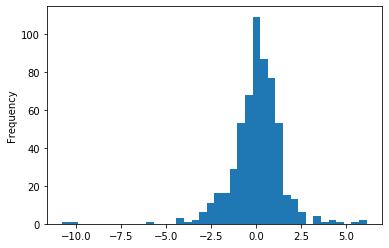

In [53]:
port_value['Portfolio Returns'].plot(kind='hist', bins=40)

VaR90 = port_value['Portfolio Returns'].quantile(0.1)
VaR95 = port_value['Portfolio Returns'].quantile(0.05)
VaR99 = port_value['Portfolio Returns'].quantile(0.01)
print(VaR90,VaR95,VaR99)

# Variance Value at Risk

The below is plotting VaR using the variance method.

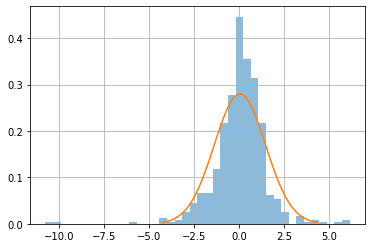

-1.7944590288483138 -2.3127938258492007 -2.3127938258492007


In [37]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as pyplot



avg = np.mean(port_value['Portfolio Returns'])
sdev = np.std(port_value['Portfolio Returns'])

port_value['Portfolio Returns'].hist(bins=40, normed=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(avg - 3*sdev, avg + 3*sdev,100)
pyplot.plot(x, norm.pdf(x, avg, sdev))
pyplot.show()

VaR90 = norm.ppf(1-0.9, avg, sdev)
VaR95 = norm.ppf(1-0.95, avg, sdev)
VaR99 = norm.ppf(1-0.95, avg, sdev)

print(VaR90,VaR95,VaR99)